In [1]:
import pandas as pd
import numpy as np
import hashlib

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = None


In [13]:
df = pd.read_csv('../data/tweets/Q1_Overall_v1.csv')

print('Shape of initial query:',df.shape)


Shape of initial query: (13661, 31)


This query did not have location limit, so we need to use User_Location column to perform a filter

In [14]:
df['User_Location'].value_counts()

User_Location
Bogotá, D.C., Colombia                                   580
Colombia                                                 359
Medellín, Colombia                                       328
Barranquilla, Colombia                                   277
Madrid, Comunidad de Madrid                              222
Venezuela                                                162
Panamá                                                   149
España                                                   118
Madrid                                                   113
Caracas, Venezuela                                       113
Ecuador                                                  105
Guayaquil, Ecuador                                       104
Cali, Colombia                                           103
Bogotá, Colombia                                          98
San Salvador, El Salvador                                 97
Costa Rica                                                94
Sevilla, E

In [15]:
# Remove Tweets without Location information
df = df.dropna(subset=['User_Location'])
df['User_Location'] = df['User_Location'].str.lower()
print('\nShape of database after removing unknown location:',df.shape)

df['User_Location'].value_counts()


Shape of database after removing unknown location: (11186, 31)


User_Location
bogotá, d.c., colombia                                   580
colombia                                                 387
medellín, colombia                                       329
barranquilla, colombia                                   277
madrid, comunidad de madrid                              222
venezuela                                                167
panamá                                                   158
españa                                                   124
madrid                                                   120
caracas, venezuela                                       113
ecuador                                                  110
guayaquil, ecuador                                       104
cali, colombia                                           103
bogotá, colombia                                          99
san salvador, el salvador                                 97
costa rica                                                94
quito, ecu

In [16]:
# Keep only Tweets with markers signifying locations in Spanish
df = df[df['User_Location'].str.contains('españa|spain|spanien|madrid|santander|málaga|andalucia|cádiz|sevilla')]

print('\nShape of database after filtering for only locations marked as Spain:',df.shape)
df['User_Location'].value_counts()


Shape of database after filtering for only locations marked as Spain: (2491, 31)


User_Location
madrid, comunidad de madrid                         222
españa                                              124
madrid                                              120
sevilla, españa                                      91
españa /xirivella                                    84
málaga, españa                                       72
madrid, españa                                       67
granada, españa                                      54
spain                                                48
león, españa                                         47
valencia, españa                                     47
madrid, spain                                        43
murcia, españa                                       37
benalmádena, españa                                  35
comunidad de madrid, españa                          30
valladolid, españa                                   30
donostia/san sebastián,españa                        28
sevilla                           

# Adding new data from new queries

`Overall_Otherlang.csv` = extract tweets with all languages except 'es' for location tagged 600km from Madrid

`New_Query.csv` = ansio* and depre* for location tagged 600km from Madrid

In [17]:
# These additoinal queries are performed with geoloc limit thus, no location filter is required

addtl_query_1 = pd.read_csv('../data/tweets/Overall_Otherlang.csv')
addtl_query_2 = pd.read_csv('../data/tweets/New_Query.csv')
addtl_query = pd.concat([addtl_query_1, addtl_query_2], axis=0)

print('Shape of additional query 1:',addtl_query_1.shape)
print('Shape of additional query 2:',addtl_query_2.shape)
print('Shape of additional query total:',addtl_query.shape)

# Check for duplicate Tweets
addtl_query = addtl_query.drop_duplicates(subset=['Tweet_ID'])
print('\nShape of database after removing duplicates:',addtl_query.shape)

# Check sequence of columns
print(addtl_query.columns == df.columns)

addtl_query.head(3)

Shape of additional query 1: (201, 31)
Shape of additional query 2: (535, 31)
Shape of additional query total: (736, 31)

Shape of database after removing duplicates: (736, 31)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


,Blue_Verified,Account_Created,User_Bio,Attached_URL,Favourites_Count,Followers_Count,Friends_Count,Listed_Count,User_Location,Media_Count,User_Name,Banner_URL,Profile_URL,User_Handle,Total_Tweets,Views_Count,Mentioned_User(s),Used_Hashtag(s),Attached_URL(s),Tweet_Content,Quote_Link,Tweet_Language,Likes_Count,Bookmarks_Count,Tweet_DateTime,Replies_Count,Retweets_Count,Quotes_Count,Tweet_URL,Tweet_ID,Conversation_ID
0,False,2020-05-13 06:29:42+00:00,Faço música.,instagram.com/011alek?igsh=M…,5744,139,296,0,"Guarulhos, Brasil",106,Alek,https://pbs.twimg.com/profile_banners/12604569...,https://pbs.twimg.com/profile_images/179567574...,011alek_,4575,438,NaN,NaN,NaN,"Po, há 2 anos atrás eu tentei suicídio, tá lig...",NaN,pt,10,0,2023-12-29 18:10:36+00:00,1,2,0,https://twitter.com/011alek_/status/1740797481...,1740797481129304512,1740797481129304512
1,False,2009-08-04 22:44:28+00:00,A loucura é o ápice da liberdade 🤟🏼,instagram.com/bruno.tvieira,6104,364,242,0,"Lisboa, Portugal",243,Bruno Tosta,https://pbs.twimg.com/profile_banners/62952688...,https://pbs.twimg.com/profile_images/171673772...,tvieirabruno,37042,113,NaN,NaN,NaN,Ficar no Colombo até 0h é mesma coisa de suicí...,NaN,pt,0,0,2023-12-12 00:34:56+00:00,0,0,0,https://twitter.com/tvieirabruno/status/173437...,1734371218386468913,1734371218386468913
2,False,2009-06-20 17:53:43+00:00,- Somos instantes.🌻\n📍 Portugal,NaN,80735,240,507,1,"Natal, Brasil",534,Camila🌾,https://pbs.twimg.com/profile_banners/49067598...,https://pbs.twimg.com/profile_images/177772508...,SrtaCamiila,29659,119,NaN,#SoyRebeldeTour,NaN,Nós fãs que vivemos na europa e sobrevivemos p...,NaN,pt,1,0,2023-12-10 18:12:53+00:00,0,0,0,https://twitter.com/SrtaCamiila/status/1733912...,1733912684016365882,1733912684016365882


In [18]:

# Combining old and new df
combined_df = pd.concat([df, addtl_query], axis=0).reset_index(drop=True)
print('\nShape of combined_df:',combined_df.shape)

print('\nColumns available in df:')
print(combined_df.columns)

print('Shape of combined dataframe:', combined_df.shape)

combined_df.head(3)


Shape of combined_df: (3227, 31)

Columns available in df:
Index(['Blue_Verified', 'Account_Created', 'User_Bio', 'Attached_URL',
       'Favourites_Count', 'Followers_Count', 'Friends_Count', 'Listed_Count',
       'User_Location', 'Media_Count', 'User_Name', 'Banner_URL',
       'Profile_URL', 'User_Handle', 'Total_Tweets', 'Views_Count',
       'Mentioned_User(s)', 'Used_Hashtag(s)', 'Attached_URL(s)',
       'Tweet_Content', 'Quote_Link', 'Tweet_Language', 'Likes_Count',
       'Bookmarks_Count', 'Tweet_DateTime', 'Replies_Count', 'Retweets_Count',
       'Quotes_Count', 'Tweet_URL', 'Tweet_ID', 'Conversation_ID'],
      dtype='object')
Shape of combined dataframe: (3227, 31)


,Blue_Verified,Account_Created,User_Bio,Attached_URL,Favourites_Count,Followers_Count,Friends_Count,Listed_Count,User_Location,Media_Count,User_Name,Banner_URL,Profile_URL,User_Handle,Total_Tweets,Views_Count,Mentioned_User(s),Used_Hashtag(s),Attached_URL(s),Tweet_Content,Quote_Link,Tweet_Language,Likes_Count,Bookmarks_Count,Tweet_DateTime,Replies_Count,Retweets_Count,Quotes_Count,Tweet_URL,Tweet_ID,Conversation_ID
0,False,2008-05-17 23:15:38+00:00,"Música, naturaleza, viajes, cine, artes, histo...",facebook.com/makinadora,6371,1286,1865,76,"navalmoral de la mata, españa",1469,Cristina Méndez,https://pbs.twimg.com/profile_banners/14815699...,https://pbs.twimg.com/profile_images/154413988...,MAKINADORA,12795,35,"@JaviGamez_ELA, @pons_sabate, @Junta_Ex, @MGua...","#LeyELAya, #sanidadextremeña, #SaludMental, #t...",https://www.radiointerior.es/2023/12/29/extrem...,Noticias que me alegran: https://t.co/Psg7ZTn...,NaN,es,1,0,2023-12-30 21:48:21+00:00,0,1,0,https://twitter.com/MAKINADORA/status/17412146...,1741214666901041466,1741214666901041466
1,False,2012-01-29 18:41:31+00:00,Account Manager | Paid Media + Social Media ✍️,instagram.com/kleo.cc/?hl=es,98809,4621,1041,5,"málaga, andalucía",3077,kleo,https://pbs.twimg.com/profile_banners/47793719...,https://pbs.twimg.com/profile_images/177062865...,Kleo_cc,70754,1026,NaN,NaN,NaN,"Esto es pregunta, creéis que la cultura rollo ...",NaN,es,3,0,2023-12-30 15:53:14+00:00,6,0,0,https://twitter.com/Kleo_cc/status/17411252983...,1741125298324726123,1741125298324726123
2,False,2014-06-17 21:32:16+00:00,I 💙 mySon,NaN,4,19,130,0,"madrid, españa",650,ANTONIO R.,https://pbs.twimg.com/profile_banners/26184010...,https://pbs.twimg.com/profile_images/177159094...,yusepe79,657,32,NaN,#ánimoquetodopasa,NaN,"ENHORABUENA y sobre todo, GRACIAS de todo cora...",NaN,es,0,0,2023-12-30 13:20:54+00:00,0,0,0,https://twitter.com/yusepe79/status/1741086961...,1741086961933124054,1741086961933124054


In [19]:
print('Number of unique locations', combined_df['User_Location'].nunique())

combined_df['User_Location'].value_counts()

Number of unique locations 881


User_Location
madrid, comunidad de madrid                         222
españa                                              124
madrid                                              121
sevilla, españa                                      91
españa /xirivella                                    84
málaga, españa                                       72
madrid, españa                                       67
granada, españa                                      54
spain                                                48
león, españa                                         47
valencia, españa                                     47
madrid, spain                                        43
Lisboa, Portugal                                     37
murcia, españa                                       37
benalmádena, españa                                  35
valladolid, españa                                   30
comunidad de madrid, españa                          30
Barcelona, España                 

In [5]:
# Convert DateTime to just date
combined_df['Tweet_DateTime'] = pd.to_datetime(combined_df['Tweet_DateTime'])
combined_df['Account_Created'] = pd.to_datetime(combined_df['Account_Created'])

combined_df['Tweet_Date'] = combined_df['Tweet_DateTime']
combined_df['Account_CreateDate'] =  combined_df['Account_Created']

combined_df[['Tweet_Date', 'Account_CreateDate']] = combined_df[['Tweet_Date', 'Account_CreateDate']].apply(pd.to_datetime)

In [11]:
print('\nShape of original combined database:',combined_df.shape)

# Check for duplicate Tweets
combined_df = combined_df.drop_duplicates(subset=['Tweet_ID', 'Tweet_Content'])
print('\nShape of database after removing duplicates:',combined_df.shape)

# Adding statistical columns to avoid including PII

combined_df['nb_mentions'] = combined_df['Mentioned_User(s)'].str.count(',') + 1
combined_df['user_age_days'] = ((combined_df['Tweet_Date'] - combined_df['Account_CreateDate']) / np.timedelta64(1, 'D')).astype('int64')

# Hash user handle
def simple_hash(value):
    return hash(value)

# Apply the hash function to the 'User_Location' column
combined_df['User_Handle_hashed'] = combined_df['User_Handle'].apply(simple_hash)

print('\nColumns available in df:')
print(combined_df.columns)

combined_df.head(3)


Shape of original combined database: (3227, 36)

Shape of database after removing duplicates: (3227, 36)

Columns available in df:
Index(['Blue_Verified', 'Account_Created', 'User_Bio', 'Attached_URL',
       'Favourites_Count', 'Followers_Count', 'Friends_Count', 'Listed_Count',
       'User_Location', 'Media_Count', 'User_Name', 'Banner_URL',
       'Profile_URL', 'User_Handle', 'Total_Tweets', 'Views_Count',
       'Mentioned_User(s)', 'Used_Hashtag(s)', 'Attached_URL(s)',
       'Tweet_Content', 'Quote_Link', 'Tweet_Language', 'Likes_Count',
       'Bookmarks_Count', 'Tweet_DateTime', 'Replies_Count', 'Retweets_Count',
       'Quotes_Count', 'Tweet_URL', 'Tweet_ID', 'Conversation_ID',
       'Tweet_Date', 'Account_CreateDate', 'nb_mentions', 'user_age_days',
       'User_Handle_hashed'],
      dtype='object')


,Blue_Verified,Account_Created,User_Bio,Attached_URL,Favourites_Count,Followers_Count,Friends_Count,Listed_Count,User_Location,Media_Count,User_Name,Banner_URL,Profile_URL,User_Handle,Total_Tweets,Views_Count,Mentioned_User(s),Used_Hashtag(s),Attached_URL(s),Tweet_Content,Quote_Link,Tweet_Language,Likes_Count,Bookmarks_Count,Tweet_DateTime,Replies_Count,Retweets_Count,Quotes_Count,Tweet_URL,Tweet_ID,Conversation_ID,Tweet_Date,Account_CreateDate,nb_mentions,user_age_days,User_Handle_hashed
0,False,2008-05-17 23:15:38+00:00,"Música, naturaleza, viajes, cine, artes, histo...",facebook.com/makinadora,6371,1286,1865,76,"navalmoral de la mata, españa",1469,Cristina Méndez,https://pbs.twimg.com/profile_banners/14815699...,https://pbs.twimg.com/profile_images/154413988...,MAKINADORA,12795,35,"@JaviGamez_ELA, @pons_sabate, @Junta_Ex, @MGua...","#LeyELAya, #sanidadextremeña, #SaludMental, #t...",https://www.radiointerior.es/2023/12/29/extrem...,Noticias que me alegran: https://t.co/Psg7ZTn...,NaN,es,1,0,2023-12-30 21:48:21+00:00,0,1,0,https://twitter.com/MAKINADORA/status/17412146...,1741214666901041466,1741214666901041466,2023-12-30 21:48:21+00:00,2008-05-17 23:15:38+00:00,4.0,5704,5374596364976420931
1,False,2012-01-29 18:41:31+00:00,Account Manager | Paid Media + Social Media ✍️,instagram.com/kleo.cc/?hl=es,98809,4621,1041,5,"málaga, andalucía",3077,kleo,https://pbs.twimg.com/profile_banners/47793719...,https://pbs.twimg.com/profile_images/177062865...,Kleo_cc,70754,1026,NaN,NaN,NaN,"Esto es pregunta, creéis que la cultura rollo ...",NaN,es,3,0,2023-12-30 15:53:14+00:00,6,0,0,https://twitter.com/Kleo_cc/status/17411252983...,1741125298324726123,1741125298324726123,2023-12-30 15:53:14+00:00,2012-01-29 18:41:31+00:00,NaN,4352,1099547531843043501
2,False,2014-06-17 21:32:16+00:00,I 💙 mySon,NaN,4,19,130,0,"madrid, españa",650,ANTONIO R.,https://pbs.twimg.com/profile_banners/26184010...,https://pbs.twimg.com/profile_images/177159094...,yusepe79,657,32,NaN,#ánimoquetodopasa,NaN,"ENHORABUENA y sobre todo, GRACIAS de todo cora...",NaN,es,0,0,2023-12-30 13:20:54+00:00,0,0,0,https://twitter.com/yusepe79/status/1741086961...,1741086961933124054,1741086961933124054,2023-12-30 13:20:54+00:00,2014-06-17 21:32:16+00:00,NaN,3482,7019719136225777545


# Data Cleaning & Prep

In [30]:
# We choose only columns that do not contain PII

columns_selected = ['Tweet_ID', 'Conversation_ID', 'Tweet_Content', 'nb_mentions','Tweet_Date', 'Used_Hashtag(s)',
                    'user_age_days', 'Tweet_Language', 'Views_Count', 'Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count',
                    'User_Handle_hashed', 'Blue_Verified', 'Followers_Count', 'Total_Tweets']

df_cleaned = combined_df[columns_selected].reset_index(drop=True)

# remove \r, n and t as this often messes up with export to csv
df_cleaned['Tweet_Content'] = df_cleaned['Tweet_Content'].str.replace('\r', ' ')
df_cleaned['Tweet_Content'] = df_cleaned['Tweet_Content'].str.replace('\n', ' ')
df_cleaned['Tweet_Content'] = df_cleaned['Tweet_Content'].str.replace('\t', ' ')


print('Shape of cleaned dataframe:', df_cleaned.shape)
df_cleaned.head(3)

Shape of cleaned dataframe: (3227, 17)


,Tweet_ID,Conversation_ID,Tweet_Content,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets
0,1741214666901041466,1741214666901041466,Noticias que me alegran: https://t.co/Psg7ZTn...,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #t...",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795
1,1741125298324726123,1741125298324726123,"Esto es pregunta, creéis que la cultura rollo ...",NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754
2,1741086961933124054,1741086961933124054,"ENHORABUENA y sobre todo, GRACIAS de todo cora...",NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657


# Final checks for duplicates

In [31]:
print("Duplicated Tweet IDs\n",df_cleaned.duplicated(['Tweet_ID']).value_counts())

print("\nDuplicated Tweet Content\n",df_cleaned.duplicated(['Tweet_Content']).value_counts())
# there is no duplicated Tweet ID in our dataframes

Duplicated Tweet IDs
 False    3227
Name: count, dtype: int64

Duplicated Tweet Content
 False    3207
True       20
Name: count, dtype: int64


In [38]:
for tweet in df_cleaned[df_cleaned.duplicated(['Tweet_Content']) == True]['Tweet_Content']:
    print(tweet)

Que depresion
Podríais dos seguidores COPIAR y volver a publicar este tuit? Intento demostrar que siempre hay alguien ahí, especialmente en esta época del año. Contra el suicidio, 914 590 050 / 914 590 055. (Teléfono de la Esperanza). Al menos dos.  COPIA, no RT.
Podríais dos seguidores COPIAR y volver a publicar este tuit? Intento demostrar que siempre hay alguien ahí, especialmente en esta época del año. Contra el suicidio, 914 590 050 / 914 590 055. (Teléfono de la Esperanza). Al menos dos. COPIA, no RT.
Podríais dos seguidores COPIAR y volver a publicar este tuit? Intento demostrar que siempre hay alguien ahí, especialmente en esta época del año. Contra el suicidio, 914 590 050 / 914 590 055. (Teléfono de la Esperanza). Al menos dos.  COPIA, no RT.
Podríais dos seguidores COPIAR y volver a publicar este tuit? Intento demostrar que siempre hay alguien ahí, especialmente en esta época del año. Contra el suicidio, 914 590 050 / 914 590 055. (Teléfono de la Esperanza). Al menos dos.  C

Those duplicated tweets seemed to be related to a campaign or an effort to gain traction/ evoke a discussion.  We decided to keep them in the dataframe.

In [18]:
print('Number of unique users:', df_cleaned.User_Handle_hashed.nunique())
print('\nOf which is Blue verified:\n', df_cleaned.groupby('Blue_Verified')['User_Handle_hashed'].nunique())

Number of unique users: 2102

Of which is Blue verified:
 Blue_Verified
False    2037
True       65
Name: User_Handle_hashed, dtype: int64


# Dataset statistics

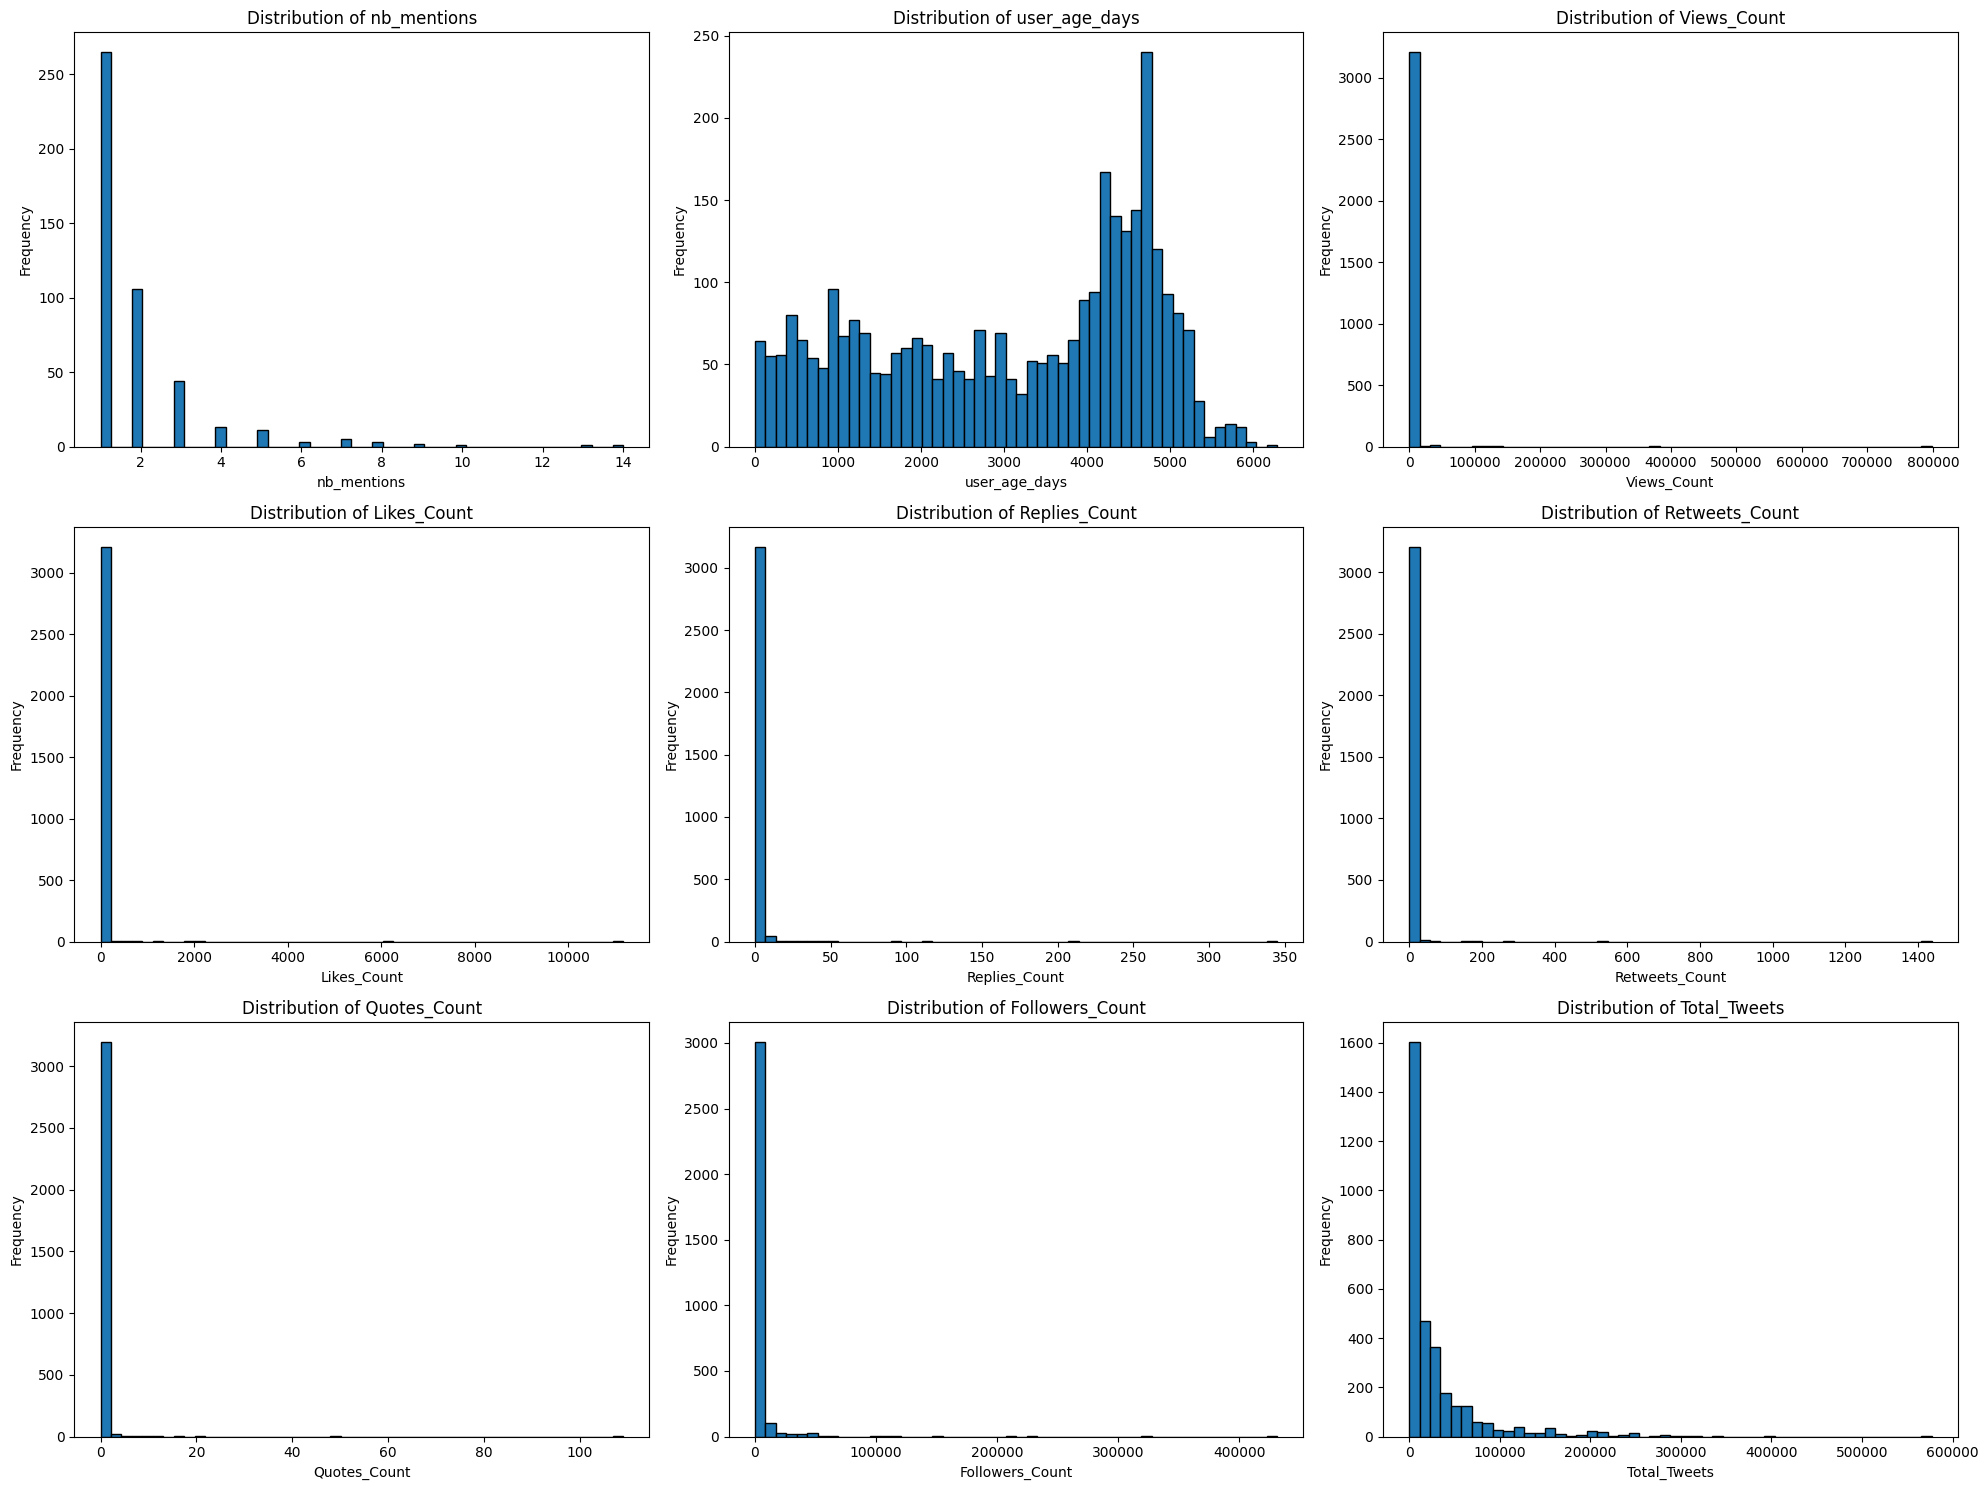

In [39]:
import matplotlib.pyplot as plt

# Select numeric columns for distribution analysis
numeric_columns = ['nb_mentions', 'user_age_days', 'Views_Count', 'Likes_Count', 
                   'Replies_Count', 'Retweets_Count', 'Quotes_Count', 'Followers_Count', 
                   'Total_Tweets']

# Plot distributions
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    df_cleaned[column].plot(kind='hist', bins=50, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Pysentimiento preprocessing and prediction

Since pysentimiento may remove hashtags, let's ensure that we capture all the hashtags first

In [41]:
import re

df_preprocessed = df_cleaned.copy()

def extract_additional_hashtags(text):
    return re.findall(r'#\w+', text)

df_preprocessed['Additional_Hashtags'] = df_preprocessed['Tweet_Content'].apply(extract_additional_hashtags)

# Combine the existing 'Hashtag(s)_Used' column with the 'Additional_Hashtags' column
df_preprocessed['Combined_Hashtags'] = df_preprocessed.apply(
    lambda row: list(set(row['Used_Hashtag(s)'].split(',') if pd.notna(row['Used_Hashtag(s)']) else []) | set(row['Additional_Hashtags'])),
    axis=1
)
# Cleanup the list markers
df_preprocessed['Combined_Hashtags'] = df_preprocessed['Combined_Hashtags'].astype(str).str.replace('[\[\]]', '', regex=True)
df_preprocessed.drop(columns=['Additional_Hashtags'], inplace=True)

print('Shape of dataframe for preprocess', df_preprocessed.shape)

df_preprocessed.head()

Shape of dataframe for preprocess (3227, 18)


,Tweet_ID,Conversation_ID,Tweet_Content,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags
0,1741214666901041466,1741214666901041466,Noticias que me alegran: https://t.co/Psg7ZTn...,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #t...",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #..."
1,1741125298324726123,1741125298324726123,"Esto es pregunta, creéis que la cultura rollo ...",NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,
2,1741086961933124054,1741086961933124054,"ENHORABUENA y sobre todo, GRACIAS de todo cora...",NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa'
3,1741083228109222003,1741083228109222003,❌No hago cardio para perder grasa. Hago cardi...,NaN,2023-12-30 13:06:04+00:00,NaN,4582,es,30206,462,9,77,3,3667104985978684545,True,68208,12295,
4,1741055907415363929,1741055907415363929,La verdadera pandemia. Principal causa externa...,NaN,2023-12-30 11:17:30+00:00,NaN,4358,es,91,2,0,0,0,5686384800043529882,False,289,5340,


In [42]:
from pysentimiento.preprocessing import preprocess_tweet

In [43]:

def clean_tweets(tweet):
    # Replaces user handles and URLs by special tokens
    # Shortens repeated characters
    # Normalizes laughters
    # Handles hashtags
    # Handles emojis
    cleaned = preprocess_tweet(tweet)
    return cleaned.replace('@usuario', '').replace('\n', ' ')

df_preprocessed['Tweet_cleaned'] = df_preprocessed['Tweet_Content'].apply(clean_tweets)
df_preprocessed.drop(columns=['Tweet_Content'], inplace=True)

print('Shape of dataframe after preprocess',df_preprocessed.shape)
df_preprocessed.head(3)

Shape of dataframe after preprocess (3227, 18)


,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned
0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #t...",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #...",Noticias que me alegran: url No lo esperaba...
1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,,"Esto es pregunta, creéis que la cultura rollo ..."
2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa',"ENHORABUENA y sobre todo, GRACIAS de todo cora..."


In [45]:
# emojis are masked with 'emoji', url and user mentions are replaced by placeholders.  We reove them as we already have columns for those

import re

def remove_substrings(text, substrings):
    # Define the regex pattern for 'emoji'
    emoji_pattern = r'emoji\s.*?emoji'
    # Remove the 'emoji' pattern
    text = re.sub(emoji_pattern, '', text).strip()

    # Remove other substrings
    for substring in substrings:
        text = text.replace(substring, '')

    return text

# List of substrings to remove
substrings_to_remove = ['url', '@usuario', 'usuario']

df_analysis = df_preprocessed.copy()

print('Shape of dataframe for analysis', df_analysis.shape)
# Apply the function to the DataFrame
df_analysis['Tweet_cleaned'] = df_analysis['Tweet_cleaned'].apply(remove_substrings, substrings=substrings_to_remove)
df_analysis.head()

Shape of dataframe for analysis (3227, 18)


,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned
0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #t...",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #...",Noticias que me alegran: No lo esperaba. l...
1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,,"Esto es pregunta, creéis que la cultura rollo ..."
2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa',"ENHORABUENA y sobre todo, GRACIAS de todo cora..."
3,1741083228109222003,1741083228109222003,NaN,2023-12-30 13:06:04+00:00,NaN,4582,es,30206,462,9,77,3,3667104985978684545,True,68208,12295,,No hago cardio para perder grasa. Hago cardio...
4,1741055907415363929,1741055907415363929,NaN,2023-12-30 11:17:30+00:00,NaN,4358,es,91,2,0,0,0,5686384800043529882,False,289,5340,,La verdadera pandemia. Principal causa externa...


# Sentiment Analysis execution

First with pysentimiento (RoBERTuito)

In [47]:
from pysentimiento import create_analyzer
from tqdm import tqdm

analyzer = create_analyzer(task="sentiment", lang="es")

def analyze_sentiment(text):
    result = analyzer.predict(text)
    label = result.output
    confidence = result.probas[label]
    return pd.Series([label, confidence])

# Apply the function to the 'Tweet_cleaned' column with progress bar
tqdm.pandas()

df_analysis[['label', 'confidence']] = df_analysis['Tweet_cleaned'].progress_apply(analyze_sentiment)
df_analysis = df_analysis.rename(columns={'label': 'py_label', 'confidence': 'py_confidence'})
df_analysis['py_label'] = df_analysis['py_label'].str.lower()

print(df_analysis.shape)
df_analysis.head(3)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
100%|██████████| 3227/3227 [00:52<00:00, 60.90it/s]

(3227, 20)


,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence
0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #t...",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #...",Noticias que me alegran: No lo esperaba. l...,pos,0.803672
1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,,"Esto es pregunta, creéis que la cultura rollo ...",neg,0.650126
2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa',"ENHORABUENA y sobre todo, GRACIAS de todo cora...",pos,0.896481


In [48]:
df_analysis.head(3)

,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence
0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #t...",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #...",Noticias que me alegran: No lo esperaba. l...,pos,0.803672
1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,,"Esto es pregunta, creéis que la cultura rollo ...",neg,0.650126
2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa',"ENHORABUENA y sobre todo, GRACIAS de todo cora...",pos,0.896481


# OpenAI sentiment analysis

Secondly with OpenAI GPT-4o model

In [50]:
from openai import OpenAI
client = OpenAI() # API key loaded into os.environment globally

In [51]:

def perform_sentiment_analysis(text):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You are a sentiment analyzer."},
            {"role": "user", "content": f"Determine the sentiment of the following text as positive, negative, or neutral: \"{text}\" \
                and provide confidence rating between 0 to 1 with five decimal points. Answer in one sentence with the following format: label : rating"}
        ]
    )
    sentiment = response.choices[0].message.content
    label, confidence_level = sentiment.split(": ")
    return label.strip(), float(confidence_level.strip())

def translate_text(text):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You are a translator."},
            {"role": "user", "content": f"Translate the following text to English as faithfully as possible to the original, without changing the tone: \"{text}\""}
        ]
    )
    translation = response.choices[0].message.content
    return translation.strip()

def process_tweet(row):
    try:
        tweet_cleaned = row['Tweet_cleaned']
        
        # Perform sentiment analysis on the original tweet
        gpt4_label, gpt4_confidence = perform_sentiment_analysis(tweet_cleaned)

        # Translate the tweet to English
        tweet_translated = translate_text(tweet_cleaned)

        # Perform sentiment analysis on the translated tweet
        gpt4translated_label, gpt4translated_confidence = perform_sentiment_analysis(tweet_translated)
        
        return pd.Series([gpt4_label, gpt4_confidence, tweet_translated, gpt4translated_label, gpt4translated_confidence])
    except Exception as e:
        print(f"Error processing Tweet_ID: {row.get('Tweet_ID', 'N/A')} at DataFrame index: {row.name}. Error: {e}")
        return pd.Series([np.nan, np.nan, np.nan, np.nan, np.nan])


# Apply the function to the DataFrame with progress bar
tqdm.pandas()
df_analysis[['GPT4_label', 'GPT4_confidence', 'Tweet_translated', 'GPT4translated_label', 'GPT4translated_confidence']] = df_analysis.progress_apply(process_tweet, axis=1)

df_analysis.head(3)

  0%|          | 0/3227 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 3227/3227 [2:12:59<00:00,  2.47s/it]  


,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence,GPT4_label,GPT4_confidence,Tweet_translated,GPT4translated_label,GPT4translated_confidence
0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #t...",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #...",Noticias que me alegran: No lo esperaba. l...,pos,0.803672,positive,0.68524,Here's the translation without altering the to...,positive,0.76234
1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,,"Esto es pregunta, creéis que la cultura rollo ...",neg,0.650126,neutral,0.94563,This is a question: Do you think that the cult...,neutral,0.82764
2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa',"ENHORABUENA y sobre todo, GRACIAS de todo cora...",pos,0.896481,positive,0.95000,"CONGRATULATIONS and above all, THANK YOU from ...",positive,0.98652


In [52]:
# Cosmetics adjustment for consistency

df_analysis = df_analysis.rename(columns={'GPT4_label': 'gpt4_label', 'GPT4_confidence': 'gpt4_confidence', 
                                          'GPT4translated_label': 'gpt4translated_label', 'GPT4translated_confidence': 'gpt4translated_confidence'})
df_analysis.head(3)

,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence,gpt4_label,gpt4_confidence,Tweet_translated,gpt4translated_label,gpt4translated_confidence
0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #t...",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #...",Noticias que me alegran: No lo esperaba. l...,pos,0.803672,positive,0.68524,Here's the translation without altering the to...,positive,0.76234
1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,,"Esto es pregunta, creéis que la cultura rollo ...",neg,0.650126,neutral,0.94563,This is a question: Do you think that the cult...,neutral,0.82764
2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa',"ENHORABUENA y sobre todo, GRACIAS de todo cora...",pos,0.896481,positive,0.95000,"CONGRATULATIONS and above all, THANK YOU from ...",positive,0.98652


In [53]:
# Final adjustments and saving the processed file to be used for analysis

df_analysis['gpt4_label'] = df_analysis['gpt4_label'].str[:3]
df_analysis['gpt4translated_label'] = df_analysis['gpt4translated_label'].str[:3]

df_analysis.to_csv('analysis.csv')
df_analysis.head(3)

,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence,gpt4_label,gpt4_confidence,Tweet_translated,gpt4translated_label,gpt4translated_confidence
0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #t...",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #...",Noticias que me alegran: No lo esperaba. l...,pos,0.803672,pos,0.68524,Here's the translation without altering the to...,pos,0.76234
1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,,"Esto es pregunta, creéis que la cultura rollo ...",neg,0.650126,neu,0.94563,This is a question: Do you think that the cult...,neu,0.82764
2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa',"ENHORABUENA y sobre todo, GRACIAS de todo cora...",pos,0.896481,pos,0.95000,"CONGRATULATIONS and above all, THANK YOU from ...",pos,0.98652
